In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [3]:
# Fetch LFW dataset with minimum faces per person = 40
lfw_people = fetch_lfw_people(min_faces_per_person=40, resize=0.4)
# Extracting data and target labels
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
# df = np.genfromtxt('./lfw_people.csv',delimiter=',')
# X = df[:, :-1]
# y = df[:, -1]
n_samples, n_features = X.shape
n_classes = len(np.unique(y))

# Print dataset statistics
print("Number of samples: %d" % n_samples)
print("Number of features: %d" % n_features)
print("Number of classes: %d" % n_classes)


Number of samples: 1777
Number of features: 1850
Number of classes: 17


# LDA Implementation

(1510, 16)
(1850, 16)


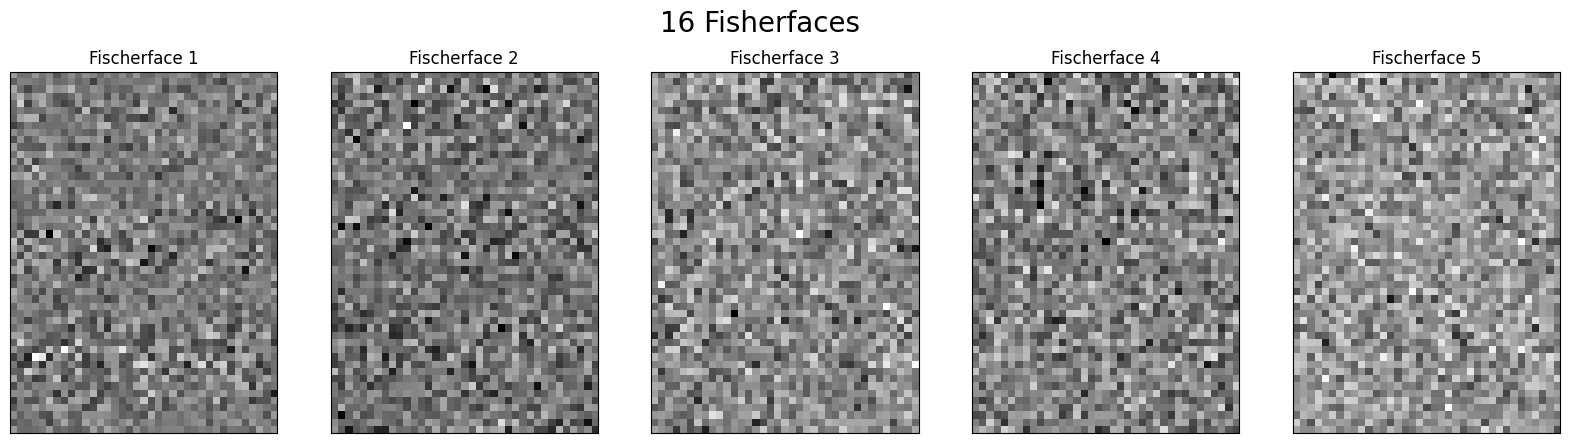

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15,stratify=y)
n_components=len(np.unique(Y_train)) - 1  # To reduce the data into n_components features.

lda = LDA()
X_projected = lda.fit_transform(X_train, Y_train)
X_test_projected = lda.transform(X_test)
print(X_projected.shape)

principal_components = lda.scalings_
print(principal_components.shape)
fisherfaces = principal_components.reshape((n_components,50,37))
plt.figure(figsize=(20, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(fisherfaces[i], cmap='gray')
    plt.title(f"Fischerface {i + 1}")
    plt.xticks(())
    plt.yticks(())
plt.suptitle(str(n_components)+" Fisherfaces",size = 20)
plt.show()

Linear Kernel model Accuracy:
0.3202846975088968


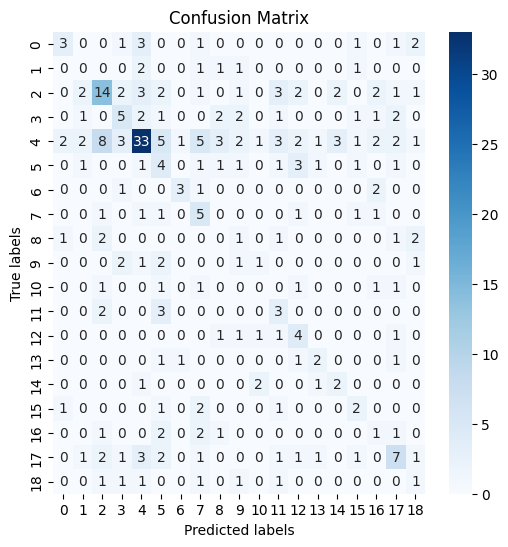

In [ ]:
## Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_projected, Y_train)
y_pred = svm_linear.predict(X_test_projected)
print("Linear Kernel model Accuracy:")
print(accuracy_score(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=np.unique(Y_train), yticklabels=np.unique(Y_train))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Best Parameters for Polynomial Kernel : {'degree': 2, 'gamma': 1.1112}
Polynomial Kernel best model Accuracy:
0.20640569395017794


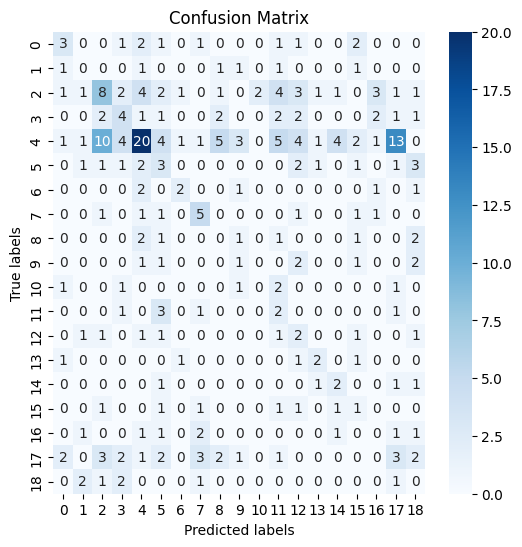

In [ ]:
## Polynomial Kernel
param_grid = {'degree': [2,3,4], 'gamma': np.linspace(0.0001,10,10)}
svm_poly = SVC(kernel='poly')
grid_search = GridSearchCV(svm_poly, param_grid, cv=4,n_jobs=-1)
grid_search.fit(X_projected, Y_train)
print("Best Parameters for Polynomial Kernel :", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_projected)
print("Polynomial Kernel best model Accuracy:")
print(accuracy_score(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=np.unique(Y_train), yticklabels=np.unique(Y_train))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Best hyperparameters found for rbf Kernel:
{'C': 100.0, 'gamma': 1e-06}
RBF Kernel best model Accuracy :
0.3274021352313167


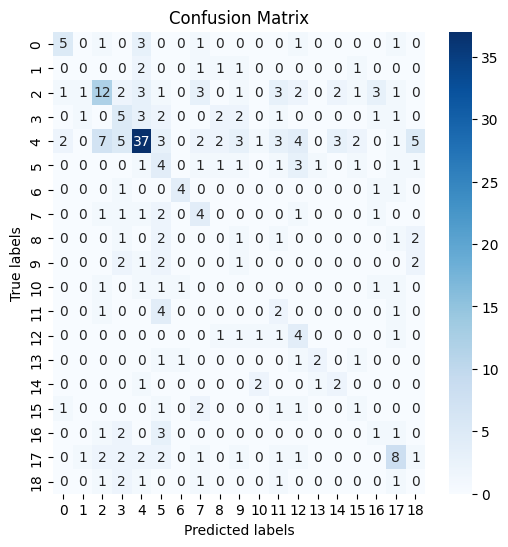

In [ ]:
## RBF Kernel
param_grid = {'C': np.linspace(100,100000,10), 'gamma': np.linspace(0.000001,0.1,10)}
svm_rbf = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_projected, Y_train)

print("Best hyperparameters found for rbf Kernel:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_projected)
print("RBF Kernel best model Accuracy :")
print(accuracy_score(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=np.unique(Y_train), yticklabels=np.unique(Y_train))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()